# Loading Dataset

Import Libraries

In [1]:
import os
import glob
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

In [2]:
extension = 'csv'
files = glob.glob(f'*.{extension}')

Read files to csv and merge togeter

In [3]:
my_list = []
for i in files:
    my_list.append(i)

df1 = pd.read_csv(my_list[0])
df2 = pd.read_csv(my_list[1])
df3 = pd.read_csv(my_list[-1])

df = pd.concat([df1, df2, df3])

# Data Exploration

In [4]:
df = df.sample(frac=1)
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
96,593-95-4461,C,Port Harcourt,Member,Male,Home and lifestyle,26949.6,1,1347.48,28297.08,3/24/2019,14:49,Cash,26949.6,4.761905,1347.48,6.9
127,268-03-6164,B,Abuja,Normal,Male,Health and beauty,34599.6,1,1729.98,36329.58,1/25/2019,16:28,Epay,34599.6,4.761905,1729.98,7.8
138,296-11-7041,B,Abuja,Member,Female,Health and beauty,9745.2,1,487.26,10232.46,1/12/2019,20:07,Card,9745.2,4.761905,487.26,5.3
299,737-88-5876,A,Lagos,Member,Male,Home and lifestyle,8384.4,4,1676.88,35214.48,3/19/2019,11:52,Card,33537.6,4.761905,1676.88,5.9
242,442-44-6497,C,Port Harcourt,Member,Male,Home and lifestyle,20005.2,3,3000.78,63016.38,1/8/2019,11:42,Card,60015.6,4.761905,3000.78,5.9


In [5]:
df.shape

(1000, 17)

In [6]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [7]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000
mean,20041.966800,5.510000,5536.572840,116268.029640,110731.456800,4.761905e+00,5536.572840,6.97270
std,9538.066205,2.923431,4215.177173,88518.720636,84303.543463,6.131498e-14,4215.177173,1.71858
min,3628.800000,1.000000,183.060000,3844.260000,3661.200000,4.761905e+00,183.060000,4.00000
25%,11835.000000,3.000000,2132.955000,44792.055000,42659.100000,4.761905e+00,2132.955000,5.50000
50%,19882.800000,5.000000,4351.680000,91385.280000,87033.600000,4.761905e+00,4351.680000,7.00000
75%,28056.600000,8.000000,8080.290000,169686.090000,161605.800000,4.761905e+00,8080.290000,8.50000
max,35985.600000,10.000000,17874.000000,375354.000000,357480.000000,4.761905e+00,17874.000000,10.00000


In [8]:
df.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


Checking for null values

In [9]:
df.notna().sum()

Invoice ID                 1000
Branch                     1000
City                       1000
Customer type              1000
Gender                     1000
Product line               1000
Unit price                 1000
Quantity                   1000
Tax 5%                     1000
Total                      1000
Date                       1000
Time                       1000
Payment                    1000
cogs                       1000
gross margin percentage    1000
gross income               1000
Rating                     1000
dtype: int64

In [10]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

No null value

# Dealing With Datetime

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 96 to 151
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage 

From the above info, we can see that Time and Date Columns are not in datetime datatype

In [12]:
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'])

In [13]:
df[['Time']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 96 to 151
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 15.6 KB


Extraction of features

In [47]:
df['Day'], df['Month'], df['Year'], df['Hour']   = df['Date'].dt.day, df['Date'].dt.month, df['Date'].dt.year, df['Time'].dt.hour

In [48]:
df[['Invoice ID','Day', 'Month', 'Year']]

,Invoice ID,Day,Month,Year
96,593-95-4461,24,3,2019
127,268-03-6164,25,1,2019
138,296-11-7041,12,1,2019
299,737-88-5876,19,3,2019
242,442-44-6497,8,1,2019
...,...,...,...,...
234,760-27-5490,20,1,2019
223,556-41-6224,15,2,2019
107,428-83-5800,9,2,2019
186,712-39-0363,2,1,2019


# Unique Values

In [16]:
df['Hour'].nunique()

1

Checking For Categorical Columns

In [17]:
categorical_columns = [col for col in df.columns if df[col].dtype == "object" ]
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment']

In [18]:
df['Branch'].unique().tolist()

['C', 'B', 'A']

In [19]:
print("Total Number of unique values in the Branch Column : {}". format(len(df['Branch'].unique().tolist())))

Total Number of unique values in the Branch Column : 3


In [20]:
df['Product line'].unique().tolist()

['Home and lifestyle',
 'Health and beauty',
 'Sports and travel',
 'Electronic accessories',
 'Food and beverages',
 'Fashion accessories']

In [21]:
df['City'].value_counts()

Lagos            340
Abuja            332
Port Harcourt    328
Name: City, dtype: int64

In [25]:
df['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

# Aggregation

In [22]:
city = df.groupby('City')
city['gross income'].max()

City
Abuja            17528.4
Lagos            17816.4
Port Harcourt    17874.0
Name: gross income, dtype: float64

In [23]:
city.agg({'gross income': 'sum'})

,gross income
City,
Abuja,1820531.52
Lagos,1820577.78
Port Harcourt,1895463.54


In [24]:
city.agg({'Quantity': 'sum'})

,Quantity
City,
Abuja,1820
Lagos,1859
Port Harcourt,1831


# Visualization

<AxesSubplot:xlabel='Branch', ylabel='count'>

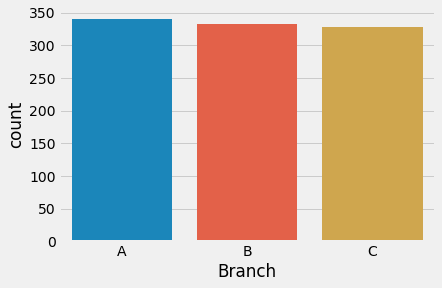

In [32]:
sns.countplot(x=df['Branch'])

<AxesSubplot:xlabel='count', ylabel='Product line'>

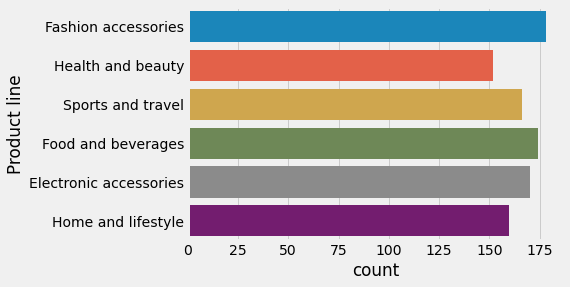

In [33]:
sns.countplot(y='Product line', data=df)

<AxesSubplot:xlabel='count', ylabel='Product line'>

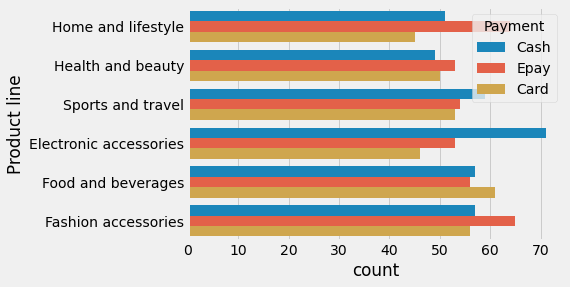

In [33]:
sns.countplot(y='Product line', hue='Payment', data=df)

<AxesSubplot:xlabel='count', ylabel='Payment'>

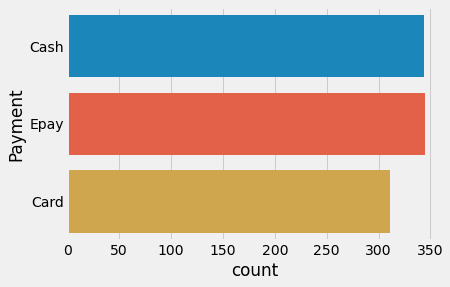

In [34]:
sns.countplot(y='Payment', data=df)

<AxesSubplot:xlabel='Payment', ylabel='count'>

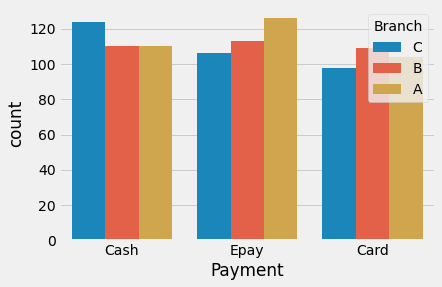

In [35]:
sns.countplot(x='Payment',hue='Branch', data=df)

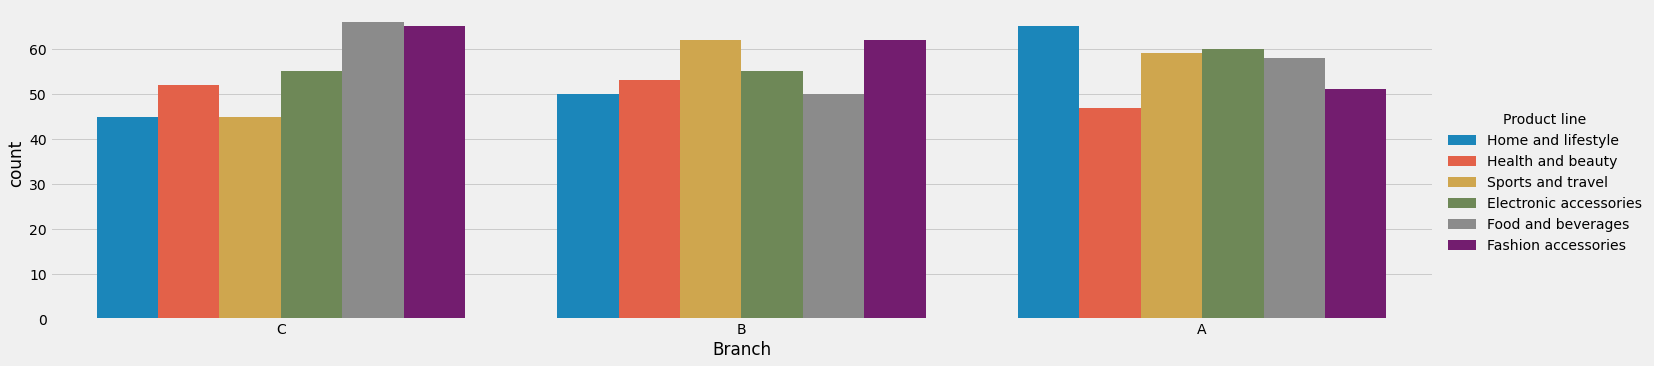

In [44]:
sns.catplot(x='Branch',hue='Product line', data=df, aspect=4, kind='count')

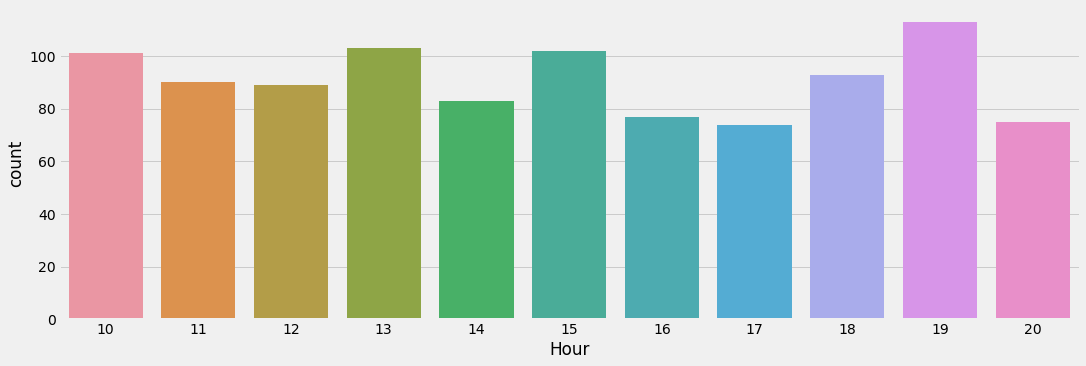

In [49]:
sns.catplot(x='Hour',kind='count', data=df, aspect=3)

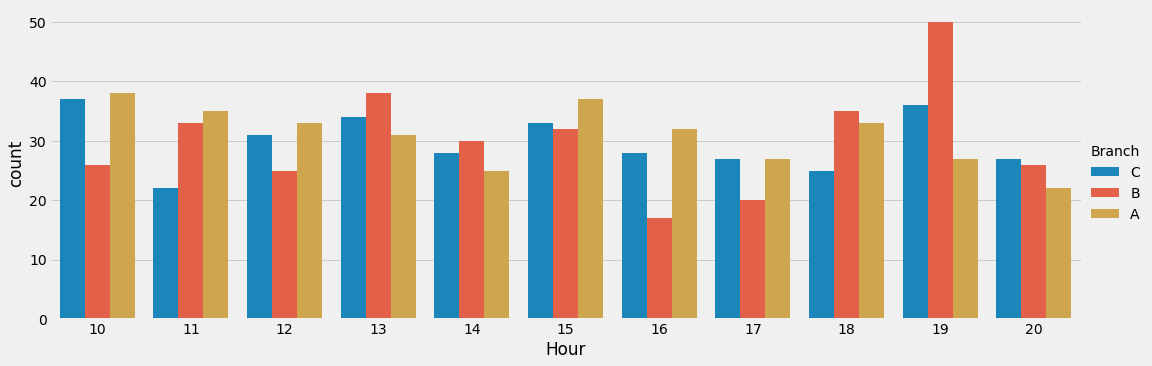

In [50]:
sns.catplot(x='Hour',  hue='Branch',kind='count', data=df, aspect=3)

In [36]:
branch = df.groupby("Branch")
branch.agg({'Rating': 'mean'})

,Rating
Branch,
A,7.027059
B,6.818072
C,7.072866


<AxesSubplot:xlabel='Branch', ylabel='Rating'>

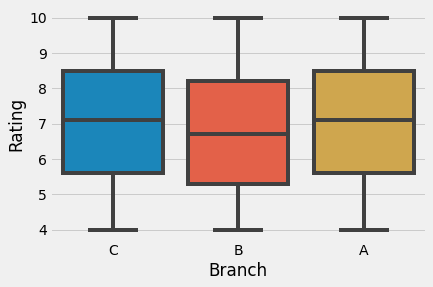

In [37]:
sns.boxplot(x='Branch', y='Rating', data=df)

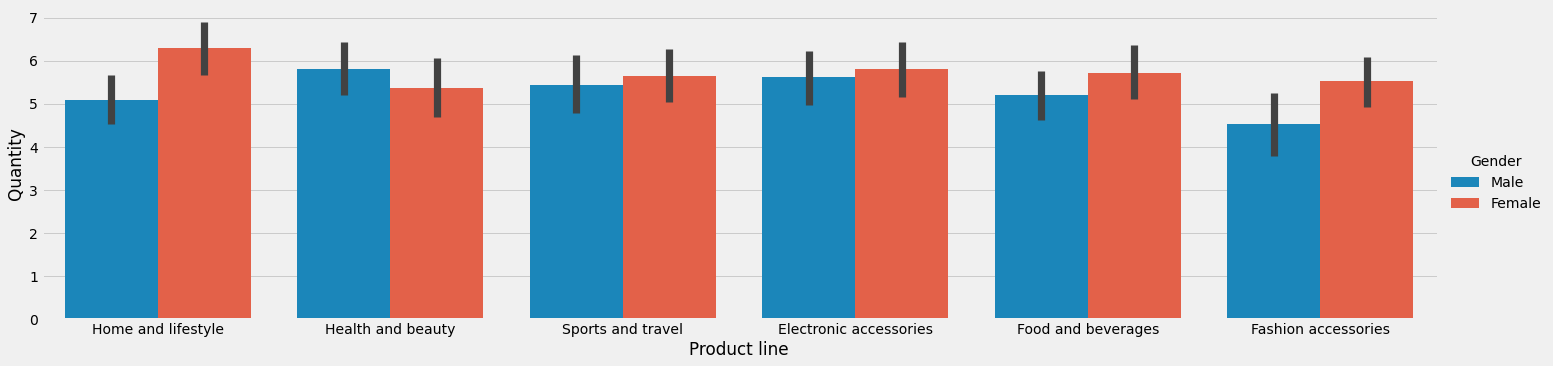

In [38]:
sns.catplot(x='Product line', y='Quantity', hue='Gender', data=df, aspect=4, kind='bar')

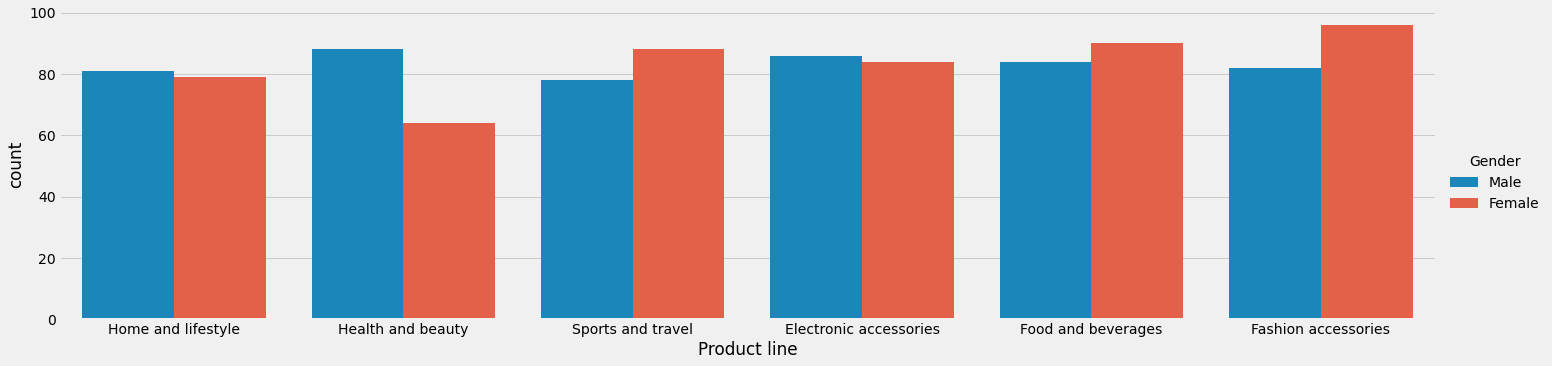

In [39]:
sns.catplot(x='Product line', hue='Gender', data=df, aspect=4, kind='count')

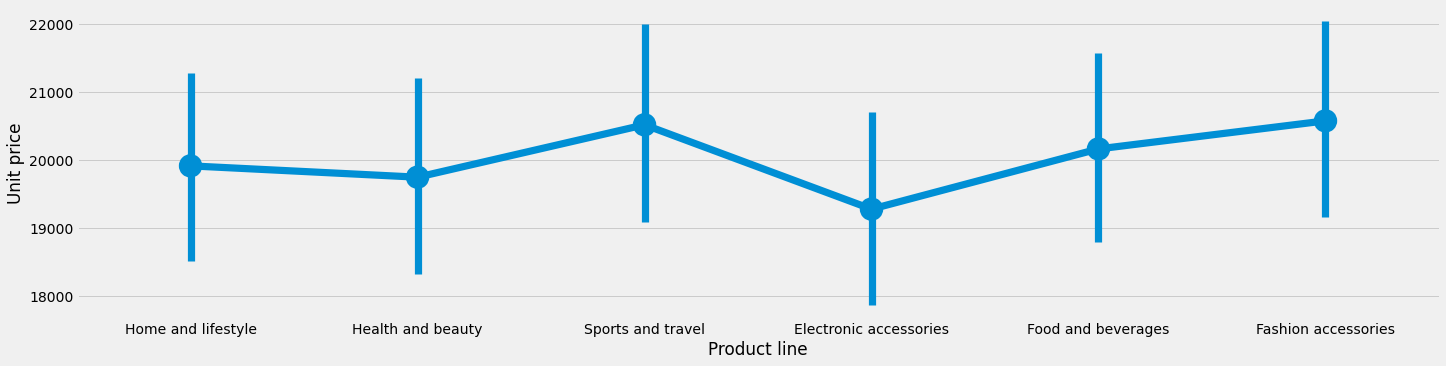

In [40]:
sns.catplot(x='Product line', y='Unit price', data=df, aspect=4, kind='point')

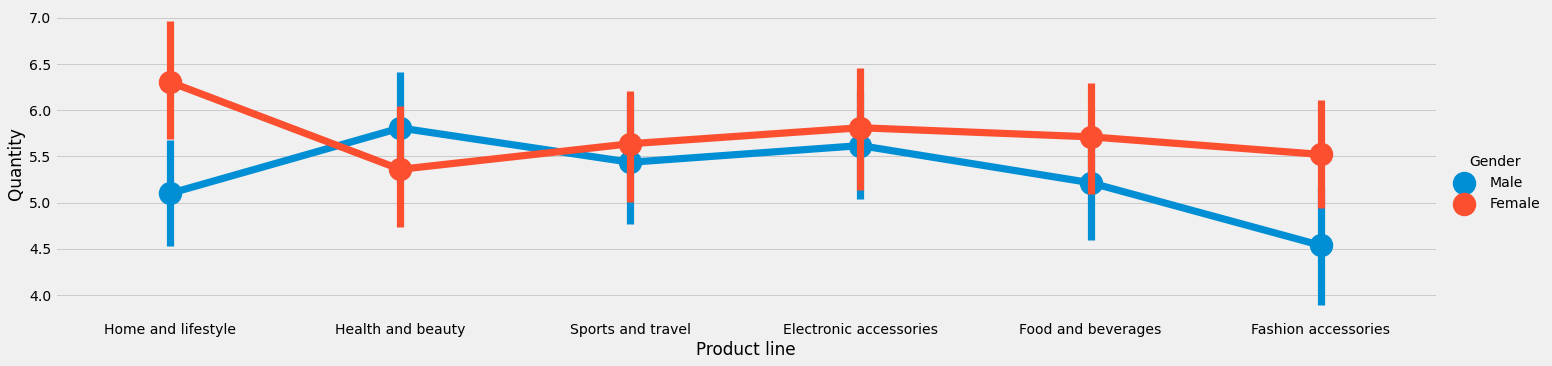

In [41]:
sns.catplot(x='Product line', y='Quantity', data=df, aspect=4, kind='point', hue='Gender')

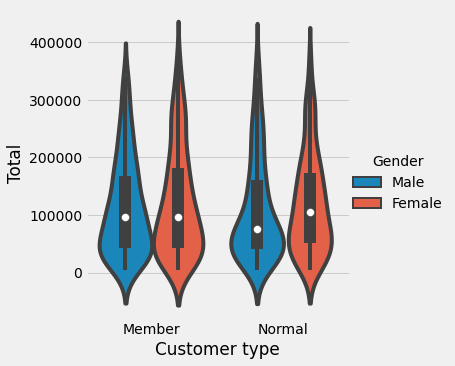

In [42]:
sns.catplot(y="Total", x="Customer type", hue="Gender", kind="violin", data=df)

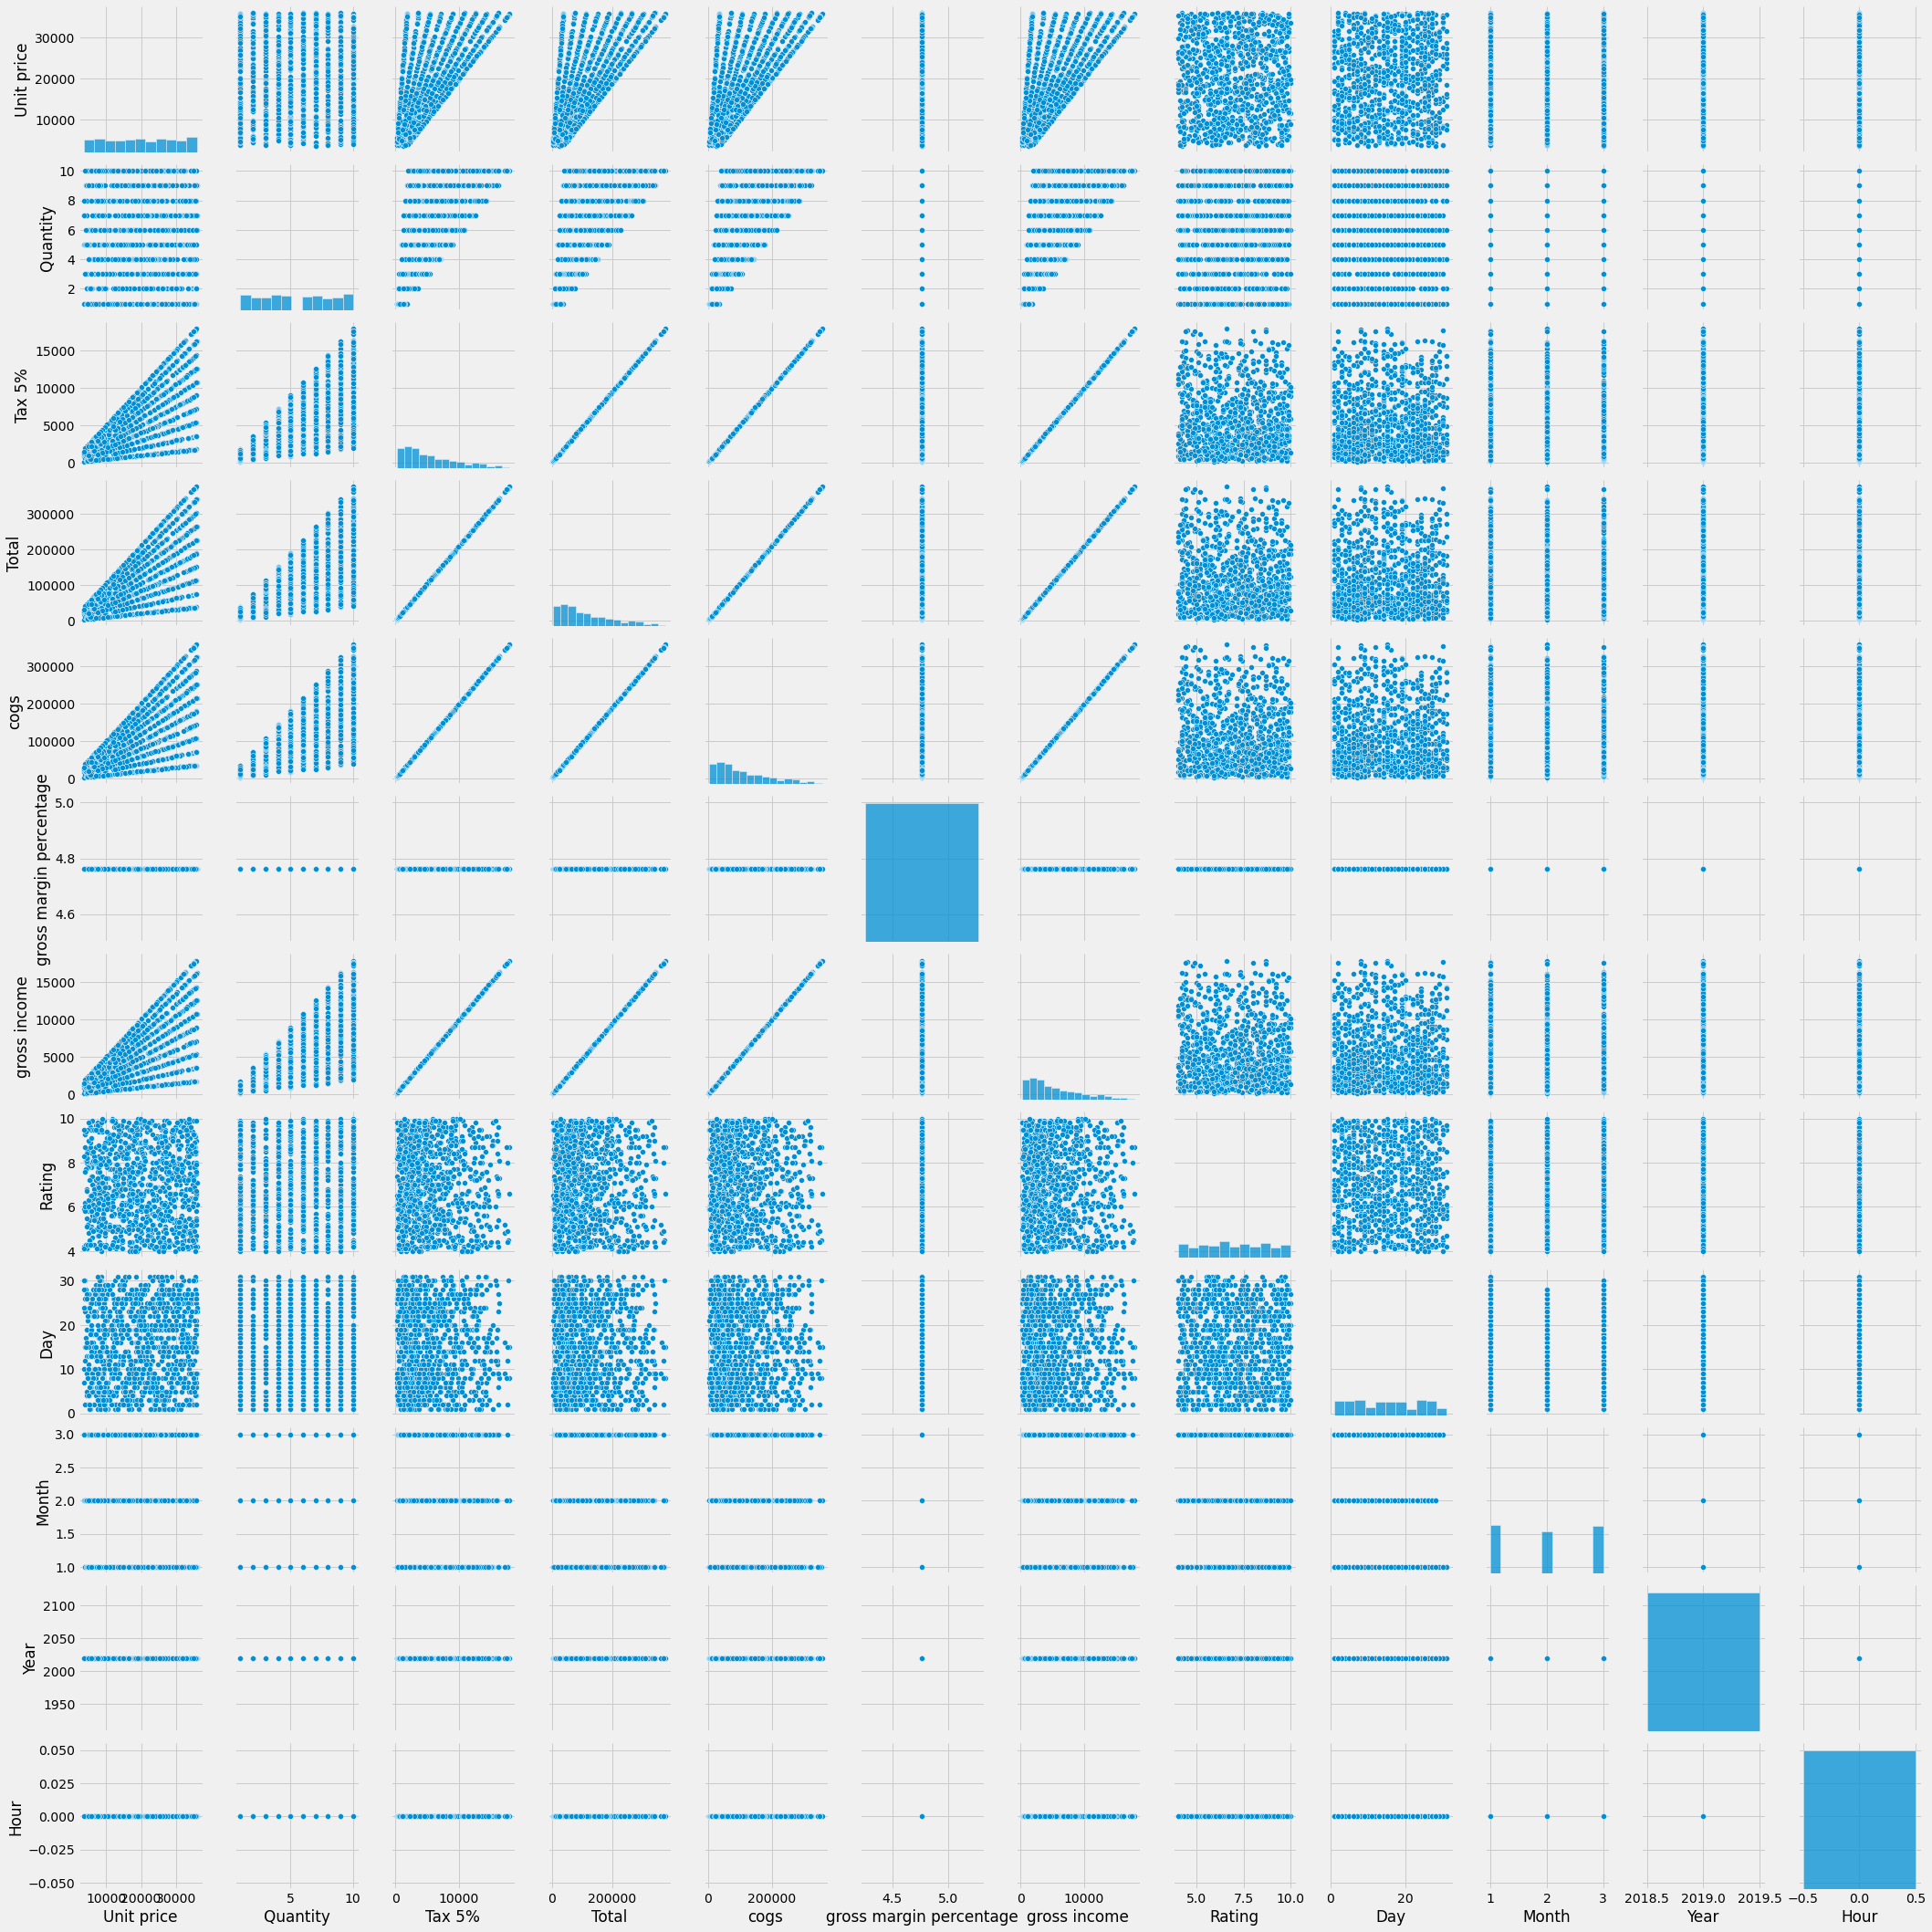

In [43]:
sns.pairplot(df)
